# Table of Contents #
---

- [Iris Dataset](#Iris-Dataset)
  - [Cross Validation](#Cross-Validation)
  - [Preprocessing](#Preprocessing)
- [Perceptron](#Perceptron)
- [Logistic Regression](#Logistic-Regression)
  - [Regularization](#Regularization)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from graphhelpers import plot_decision_regions

## Iris Dataset ##

In [2]:
iris = datasets.load_iris()

print iris.feature_names
print iris.target_names

X = iris.data[:, [2, 3]]
y = iris.target

print np.unique(y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 1 2]


### Cross Validation ###
[scikit-learn Cross Validation documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [3]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=.3, random_state=0)

### Preprocessing ###

In [4]:
sc = StandardScaler()
sc.fit(XTrain)
XTrainStd = sc.transform(XTrain)
XTestStd = sc.transform(XTest)

# Perceptron #

[scikit-learn Perceptron documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [5]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(XTrainStd, yTrain)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
yPred = ppn.predict(XTestStd)
print 'Misclassified samples: {0}'.format((yPred != yTest).sum())
print 'Total samples: {0}'.format(len(yPred))
print 'Misclassification error: {0:.3f}'.format(4./45.)
print 'Accuracy: {:.3f}'.format(1 - 4./45.)

Misclassified samples: 4
Total samples: 45
Misclassification error: 0.089
Accuracy: 0.911


In [7]:
# Using the sklearn.metrics.accuracy_score method
print 'Accuracy: {acc:.1f}%'.format(acc=accuracy_score(yPred, yTest)*100)

Accuracy: 91.1%


In [8]:
XCombinedStd = np.vstack((XTrainStd, XTestStd))
yCombined = np.hstack((yTrain, yTest))

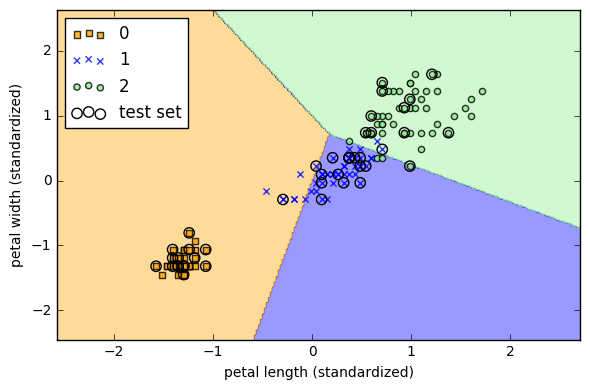

In [9]:
plt = plot_decision_regions(X=XCombinedStd, y=yCombined, classifier=ppn, testIndexRange=range(len(XTrainStd), len(XCombinedStd)))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Logistic Regression #

[scikit-learn Logistic Regression documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [10]:
# logit(p) = log( p / (1 - p) ) = z
# p / (1 - p) = e^z
# (1 - p) / p = e^-z
# (1 / p) - 1 = e^-z
# 1 / p = 1 + e^-z
# p = 1 / (1 + e^-z) = sigmoid(z)

def sigmoid(z):
    return 1. / (1. + np.exp(-z))

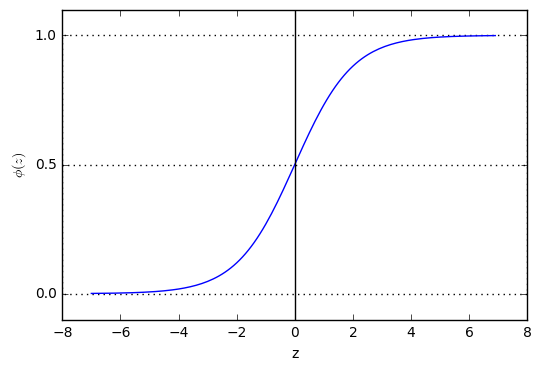

In [11]:
z = np.arange(-7, 7, .1)
phiZ = sigmoid(z)

plt.plot(z, phiZ)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0, .5, 1])
plt.ylim(-.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.show()

In Adaline the "activation" function was just the identity function (matrix)

In Logistic regression the activation function = the sigmoid function

In [12]:
lr = LogisticRegression(C=1000., random_state=0)

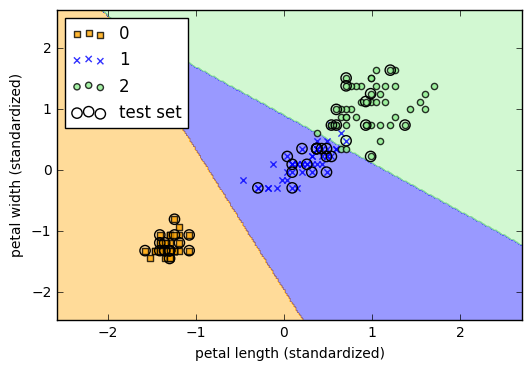

In [13]:
lr.fit(XTrainStd,yTrain)
plot_decision_regions(XCombinedStd, yCombined, classifier=lr, testIndexRange=range(len(XTrainStd), len(XCombinedStd)))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

In [14]:
# reshape to (1, -1) since it's a single sample
lr.predict_proba(XTestStd[0, :].reshape(1, -1)).round(3)

array([[ 0.   ,  0.063,  0.937]])

In [15]:
lr.coef_

array([[-7.34015187, -6.64685581],
       [ 2.54373335, -2.3421979 ],
       [ 9.46617627,  6.44380858]])

## Regularization ##

lambda (regularization parameter) = 1 / C

In [16]:
weights, params = [], []
for c in np.arange(-5, 5):
    params.append(10**c)
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(XTrainStd, yTrain)
    weights.append(lr.coef_[1])  # coefficients for 2nd class (versicolor)

weights = np.array(weights)

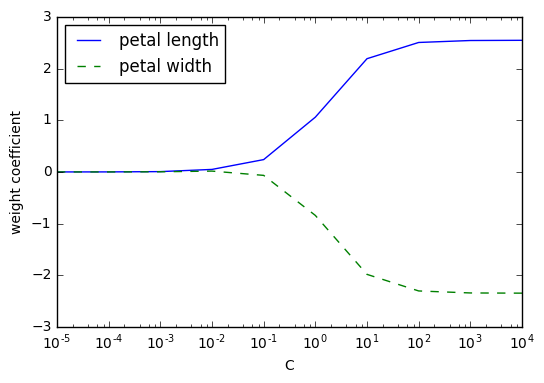

In [17]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()